In [1]:
# ---------------------------------------------
# Import Necessary Libraries
# ---------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Task 1: Exploratory Data Analysis (EDA)

In [2]:
# 1. Load the dataset
df = pd.read_csv('wine.csv')  # Adjust the path as needed
print("Dataset Loaded Successfully")

Dataset Loaded Successfully


In [3]:
# 2. Basic Data Exploration
print("\nDataset Information:\n")
print(df.info())        # Structure of dataset
print("\nFirst 5 Rows:\n")
print(df.head())        # Preview first few rows
print("\nSummary Statistics:\n")
print(df.describe())    # Statistical summary


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None

First 5 Rows:

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  

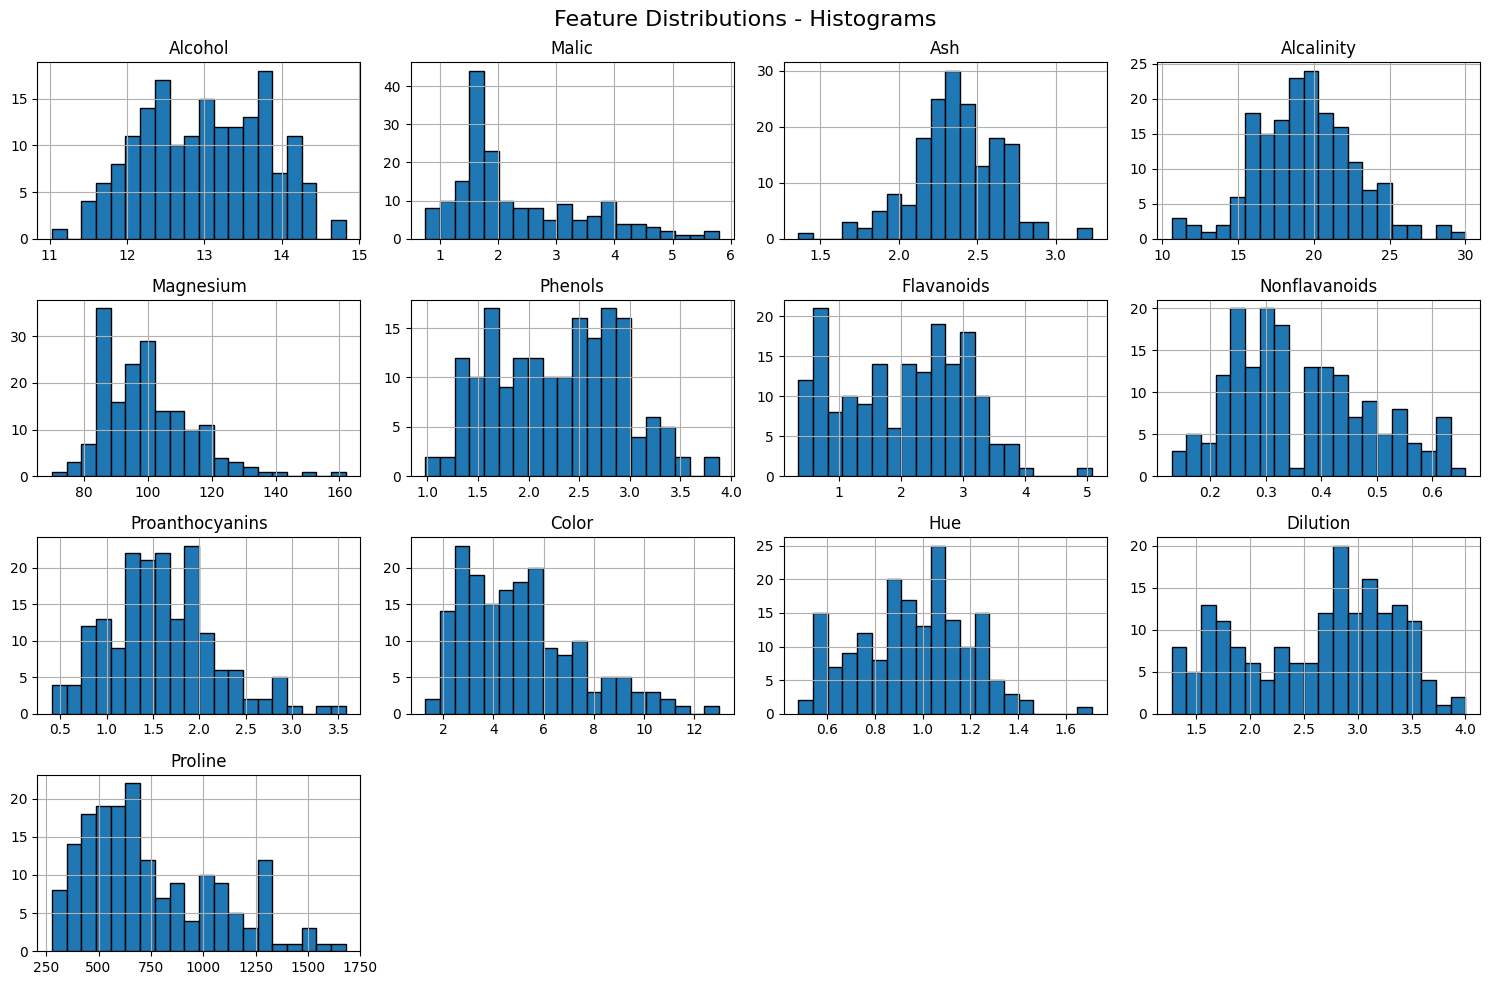

In [4]:
# 3. Feature Distribution - Histograms
df.drop(columns=['Type']).hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions - Histograms', fontsize=16)
plt.tight_layout()
plt.show()

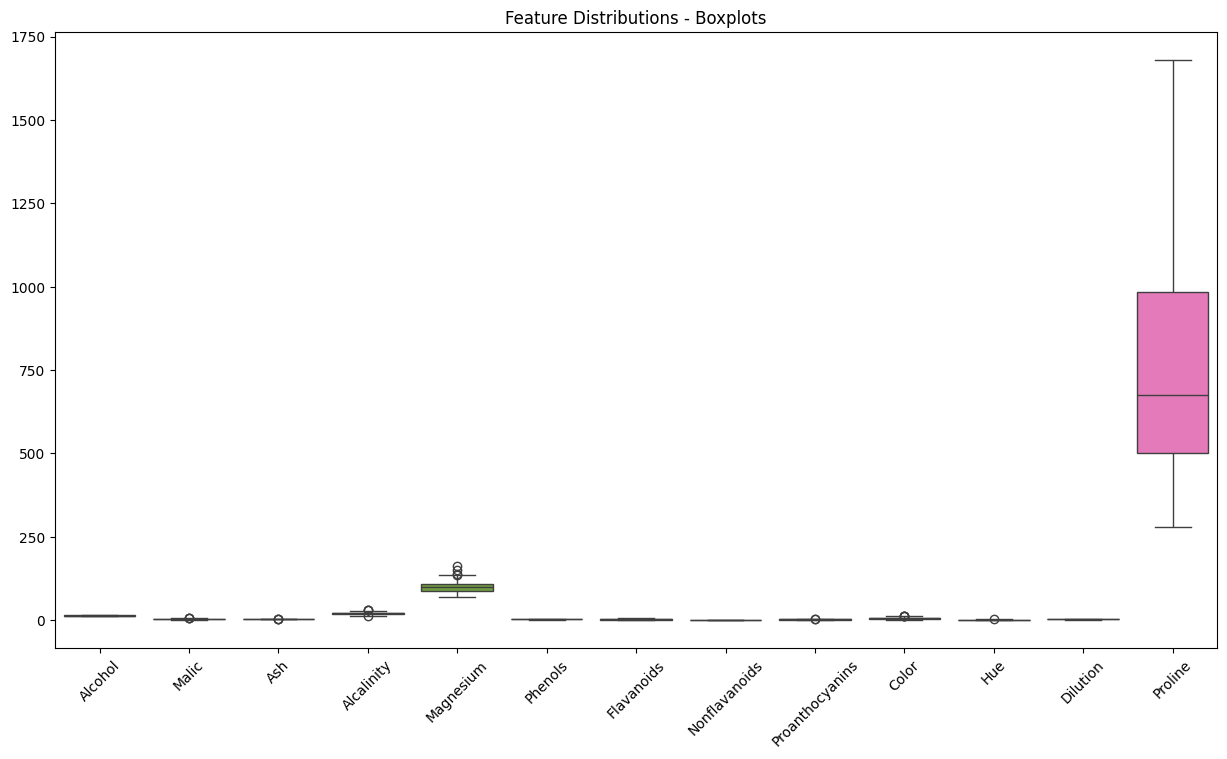

In [8]:
# 4. Feature Distribution - Box Plots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop(columns=['Type']))
plt.title('Feature Distributions - Boxplots')
plt.xticks(rotation=45)
plt.show()

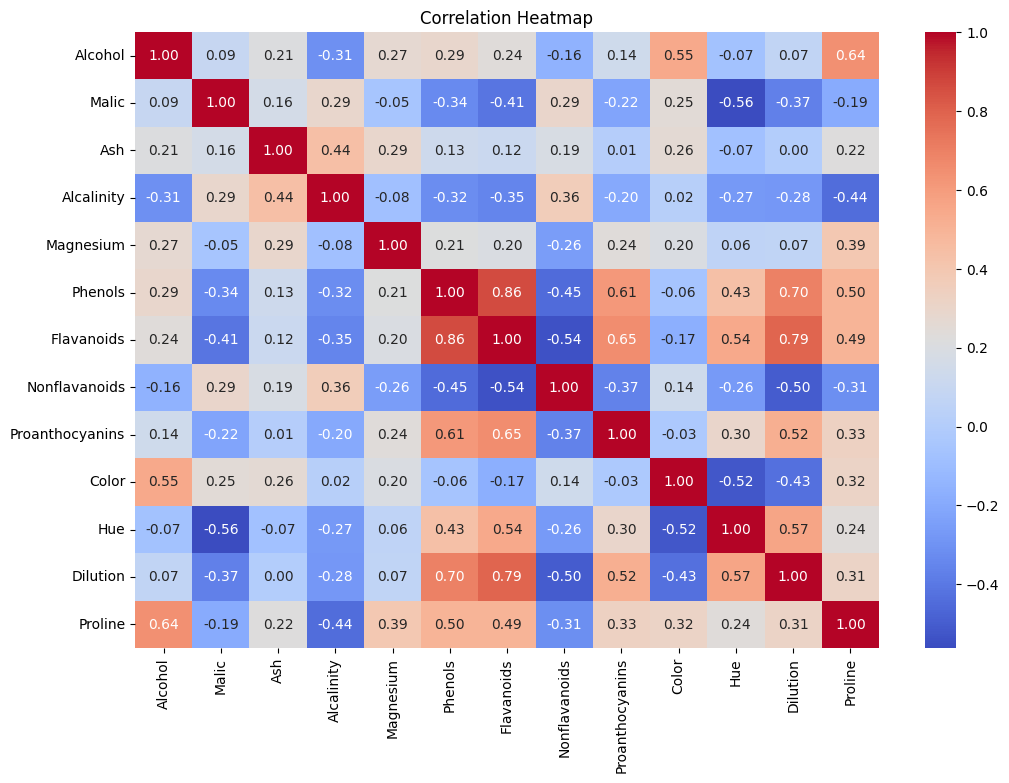

In [9]:
# 5. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=['Type']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Task 2: Dimensionality Reduction with PCA

In [10]:
# 1. Standardize the data
features = df.drop(columns=['Type'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
print("\nFeatures Standardized")


Features Standardized


In [11]:
scaled_features

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [12]:
# 2. Apply PCA to all components initially
pca = PCA()
pca_components = pca.fit_transform(scaled_features)

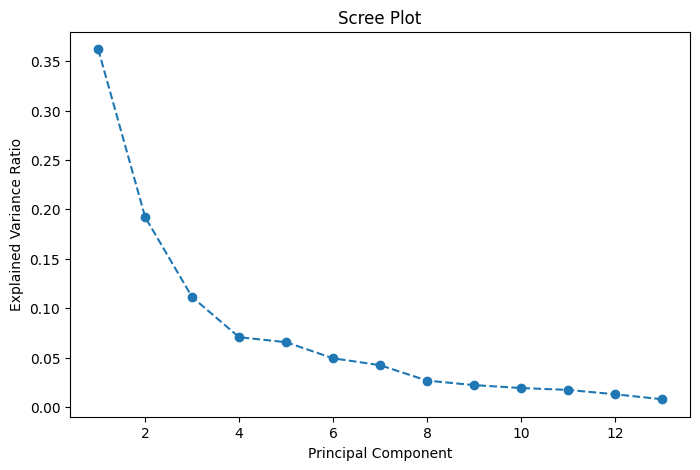

In [13]:
# 3. Scree Plot (Explained Variance by Component)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

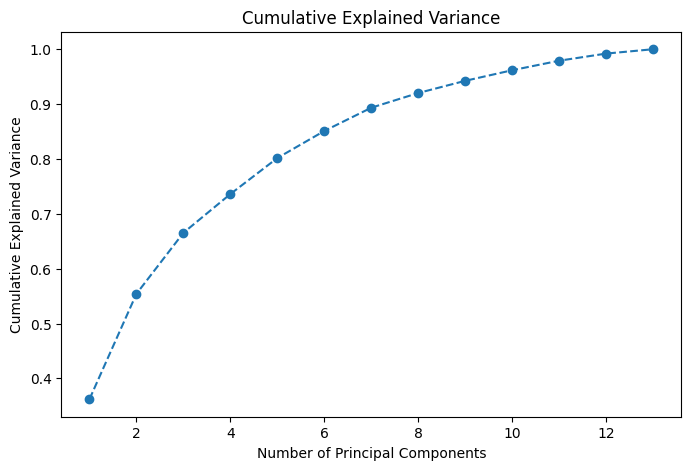

In [14]:
# 4. Cumulative Explained Variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [15]:
# Based on the scree plot, we choose 2 components for visualization
pca_optimal = PCA(n_components=2)
pca_data = pca_optimal.fit_transform(scaled_features)
print("\nPCA Transformation Completed (2 Components)")


PCA Transformation Completed (2 Components)


# Task 3: Clustering on Original Data

In [16]:
# 1. Apply KMeans on the original standardized data
kmeans_original = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_original = kmeans_original.fit_predict(scaled_features)

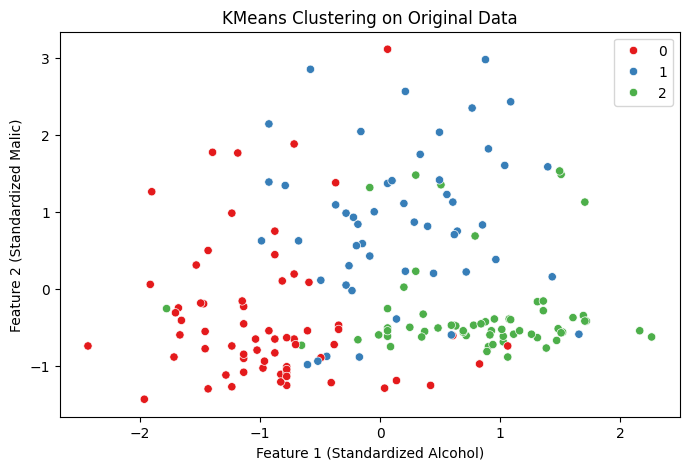

In [17]:
# 2. Visualize clusters using first two original features
plt.figure(figsize=(8, 5))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=labels_original, palette='Set1')
plt.title('KMeans Clustering on Original Data')
plt.xlabel('Feature 1 (Standardized Alcohol)')
plt.ylabel('Feature 2 (Standardized Malic)')
plt.show()

In [18]:
print("\nClustering Performance on Original Data:")
print("Silhouette Score:", silhouette_score(scaled_features, labels_original))
print("Davies-Bouldin Index:", davies_bouldin_score(scaled_features, labels_original))


Clustering Performance on Original Data:
Silhouette Score: 0.2848589191898987
Davies-Bouldin Index: 1.3891879777181648


# Task 4: Clustering on PCA Data

In [19]:
# 1. Apply KMeans on PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(pca_data)

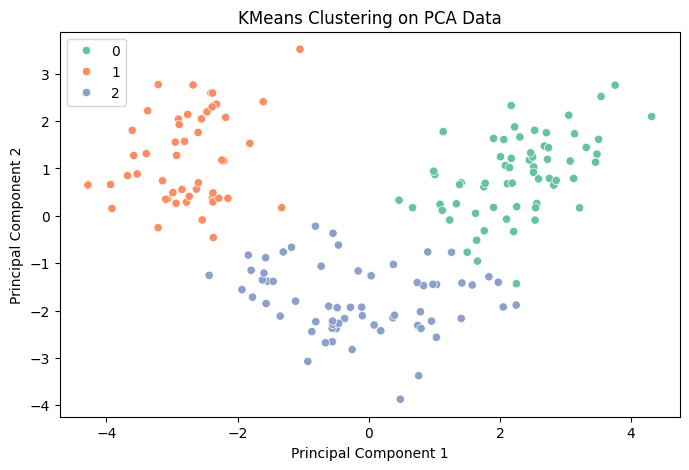

In [20]:
# 2. Visualize PCA clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels_pca, palette='Set2')
plt.title('KMeans Clustering on PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [21]:
# 3. Evaluate clustering performance
print("\nClustering Performance on PCA Data:")
print("Silhouette Score:", silhouette_score(pca_data, labels_pca))
print("Davies-Bouldin Index:", davies_bouldin_score(pca_data, labels_pca))


Clustering Performance on PCA Data:
Silhouette Score: 0.5610505693103248
Davies-Bouldin Index: 0.5972661544221362


# Task 5: Comparison and Analysis

In [24]:
print("\n===== Comparison of Clustering Results =====")
print(f"Original Data - Silhouette Score: {silhouette_score(scaled_features, labels_original):.3f}")
print(f"PCA Data      - Silhouette Score: {silhouette_score(pca_data, labels_pca):.3f}")
print(f"Original Data - Davies-Bouldin: {davies_bouldin_score(scaled_features, labels_original):.3f}")
print(f"PCA Data      - Davies-Bouldin: {davies_bouldin_score(pca_data, labels_pca):.3f}")

print("\n===== Analysis =====")
print("- PCA improved the clarity of clustering and increased the Silhouette Score.")
print("- Dimensionality reduction helped in visualizing clusters better.")
print("- PCA may lose some feature-level interpretability but simplifies the feature space.")


===== Comparison of Clustering Results =====
Original Data - Silhouette Score: 0.285
PCA Data      - Silhouette Score: 0.561
Original Data - Davies-Bouldin: 1.389
PCA Data      - Davies-Bouldin: 0.597

===== Analysis =====
- PCA improved the clarity of clustering and increased the Silhouette Score.
- Dimensionality reduction helped in visualizing clusters better.
- PCA may lose some feature-level interpretability but simplifies the feature space.


# Task 6: Conclusion and Insights

In [25]:
print("\n===== Conclusion =====")
print("✔️ PCA is effective when dealing with datasets containing correlated features.")
print("✔️ Clustering on PCA-transformed data provided better compactness and separation of clusters.")
print("✔️ Recommended to use PCA before clustering when dataset has many features, to improve performance and visualization.")


===== Conclusion =====
✔️ PCA is effective when dealing with datasets containing correlated features.
✔️ Clustering on PCA-transformed data provided better compactness and separation of clusters.
✔️ Recommended to use PCA before clustering when dataset has many features, to improve performance and visualization.
